# Instance-based Learning

Instance based learning works directly on the learned samples, instead of creating rules compared to other classification methods.

Way of working: Each new instance is compared with the already existing instances. The instances are compared by using a distance metric. The instance with the closest distance value detwermines the class for the new instance. This classification method is called nearest-neighbor classification.

## k-Nearest-Neighbor Classifier

The principle behind nearest neighbor classification consists in finding a predefined number, i.e. the 'k' - of training samples closest in distance to a new sample, which has to be classified. The label of the new sample will be defined from these neighbors. k-nearest neighbor classifiers have a fixed user defined constant for the number of neighbors which have to be determined. There are also radius-based neighbor learning algorithms, which have a varying number of neighbors based on the local density of points, all the samples inside of a fixed radius. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply "remember" all of its training data. Classification can be computed by a majority vote of the nearest neighbors of the unknown sample.

The k-NN algorithm is among the simplest of all machine learning algorithms, but despite its simplicity, it has been quite successful in a large number of classification and regression problems, for example character recognition or image analysis.

Now let's get a little bit more mathematically:

The k-Nearest-Neighbor Classifier (k-NN) works directly on the learned samples, instead of creating rules compared to other classification methods.

Nearest Neighbor Algorithm:

Given a set of categories $\{c1,c2,...cn\}$, also called classes, e.g. ${"male", "female"}$. There is also a learnset $LS$ consisting of labelled instances.

The task of classification consists in assigning a category or class to an arbitrary instance. If the instance $o$ is an element of $LS$, the label of the instance will be used.

Now, we will look at the case where $o$ is not in $LS$: $o$ is compared with all instances of $LS$. A distance metric is used for comparison. We determine the $k$ closest neighbors of $o$, i.e. the items with the smallest distances. $k$ is a user defined constant and a positive integer, which is usually small.

The most common class of $LS$ will be assigned to the instance $o$. If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.

The algorithm for the k-nearest neighbor classifier is among the simplest of all machine learning algorithms. k-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all the computations are performed, when we do the actual classification.

## Preparing DataSet

Before we actually start with writing a nearest neighbor classifier, we need to think about the data, i.e. the learnset. We will use the "iris" dataset provided by the datasets of the sklearn module.

The data set consists of 50 samples from each of three species of Iris

Iris setosa,
Iris virginica and
Iris versicolor.
Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

In [55]:
import numpy as np
from sklearn import datasets
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data[0], iris_data[79], iris_data[100])
print(iris_labels[0], iris_labels[79], iris_labels[100])

np.random.seed(42)
indices = np.random.permutation(len(iris_data))
n_training_samples = 12
learnset_data = iris_data[indices[:-n_training_samples]]
learnset_labels = iris_labels[indices[:-n_training_samples]]
testset_data = iris_data[indices[-n_training_samples:]]
testset_labels = iris_labels[indices[-n_training_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])



[5.1 3.5 1.4 0.2] [5.7 2.6 3.5 1. ] [6.3 3.3 6.  2.5]
0 1 2
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]] [1 0 2 1]
[[5.7 2.8 4.1 1.3]
 [6.5 3.  5.5 1.8]
 [6.3 2.3 4.4 1.3]
 [6.4 2.9 4.3 1.3]] [1 2 1 1]


The following code is only necessary to visualize the data of our learnset. Our data consists of four values per iris item, so we will reduce the data to three values by summing up the third and fourth value. This way, we are capable of depicting the data in 3-dimensional space:

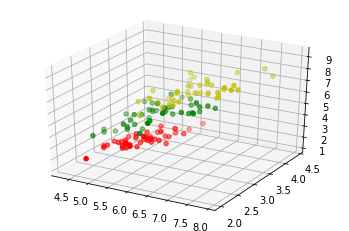

In [56]:
# following line is only necessary, if you use ipython notebook!!!
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
colours = ("r", "b")
X = []
for iclass in range(3):
    X.append([[], [], []])
    for i in range(len(learnset_data)):
        if learnset_labels[i] == iclass:
            X[iclass][0].append(learnset_data[i][0])
            X[iclass][1].append(learnset_data[i][1])
            X[iclass][2].append(sum(learnset_data[i][2:]))
colours = ("r", "g", "y")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for iclass in range(3):
       ax.scatter(X[iclass][0], X[iclass][1], X[iclass][2], c=colours[iclass])
plt.show()

## Determining Neighboards

To determine the similarity between two instances, we need a distance function. In our example, the Euclidean distance is ideal:

In [57]:
def distance(instance1, instance2):
    # just in case, if the instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learnset_data[3], learnset_data[44]))

4.47213595499958
3.4190641994557516


## <font color='blue'>Exercise!</font>
Now let's pause for a second and write down the equation of Euclidian distance. What is the equation for Euclidian distance and how can we implement it in python without using a library? Implement the solution below.  

In [58]:
# Solution
# Calculate te euclidean distance without using any library

x=np.array([1,2,3])
y=np.array([2,3,4])
suma=sum(y-x)
euclidean = suma**(1/2)
print(euclidean)

n=len(x)
euclidean=0
for i in range(n):
   euclidean+= (x[i]-y[i])**2

euclidean = (euclidean)**(1/2)
print(euclidean)

# Check the euclidean distance using scipy
# from scipy.spatial import distance
# dst = distance.euclidean(x, y)
# print(dst)

# Check the euclidean using numpy
import numpy as np
dist = np.linalg.norm(x-y)
print(dist)

1.7320508075688772
1.7320508075688772
1.7320508075688772


The function 'get_neighbors returns a list with 'k' neighbors, which are closest to the instance 'test_instance':


In [59]:
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=distance):
    """
    get_neighors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where 
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = []
    for index in range(len(training_set)):
        dist = distance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors

We will test the function with our iris samples:

In [60]:
for i in range(5):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print(i, 
          testset_data[i], 
          testset_labels[i], 
          neighbors)

0 [5.7 2.8 4.1 1.3] 1 [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)]
1 [6.5 3.  5.5 1.8] 2 [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)]
2 [6.3 2.3 4.4 1.3] 1 [(array([6.2, 2.2, 4.5, 1.5]), 0.2645751311064586, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)]
3 [6.4 2.9 4.3 1.3] 1 [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.6, 1.3]), 0.3605551275463984, 1)]
4 [5.6 2.8 4.9 2. ] 2 [(array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.8, 2.7, 5.1, 1.9]), 0.3162277660168375, 2), (array([5.7, 2.5, 5. , 2. ]), 0.33166247903553986, 2)]


## <font color='red'>Discussion! </font> 
By now we have learned that kNN is a generic approach. Therefore, it can be applied in many different ways. What kind of ways can you think of that can help to build a classifier from kNN? 

## Voting to get a Single Result

We will write a vote function now. This functions uses the class 'Counter' from collections to count the quantity of the classes inside of an instance list. This instance list will be the neighbors of course. The function 'vote' returns the most common class:

In [61]:
from collections import Counter
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

We will test 'vote' on our training samples:

In [62]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


We can see that the predictions correspond to the labelled results, except in case of the item with the index 8.

'vote_prob' is a function like 'vote' but returns the class name and the probability for this class:

In [63]:
def vote_prob(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    labels, votes = zip(*class_counter.most_common())
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    return winner, votes4winner/sum(votes)

In [64]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              5, 
                              distance=distance)
    print("index: ", i, 
          ", vote_prob: ", vote_prob(neighbors), 
          ", label: ", testset_labels[i], 
          ", data: ", testset_data[i])

index:  0 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , vote_prob:  (2, 1.0) , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , vote_prob:  (2, 1.0) , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , vote_prob:  (2, 0.8) , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , vote_prob:  (1, 1.0) , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , vote_prob:  (1, 1.0) , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , vote_prob:  (0, 1.0) , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , vote_prob:  (1, 1.0) , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , vote_prob:  (2, 1.0) , label:  2 , data:  [7.1 3.  5.9 2.1]


## The Weighted Nearest Neighbour Classifier

We looked only at $k$ items in the vicinity of an unknown object "UO", and had a majority vote. Using the majority vote has shown quite efficient in our previous example, but this didn't take into account the following reasoning: The farther a neighbor is, the more it "deviates" from the "real" result. Or in other words, we can trust the closest neighbors more than the farther ones. Let's assume, we have 11 neighbors of an unknown item UO. The closest five neighbors belong to a class $A$ and all the other six, which are farther away belong to a class $B$. What class should be assigned to UO? The previous approach says B, because we have a 6 to 5 vote in favor of $B$. On the other hand the closest 5 are all $A$ and this should count more.

To pursue this strategy, we can assign weights to the neighbors in the following way: The nearest neighbor of an instance gets a weight $1/1$, the second closest gets a weight of $1/2$ and then going on up to $1/k$ for the farthest away neighbor.

This means that we are using the harmonic series as weights: $\sum^{k}_{i} \frac{1}{i+1} = 1 + \frac{1}{2}+ \frac{1}{3} + ... + + \frac{1}{k}$

We implement this in the following function:

In [75]:
def vote_harmonic_weights(neighbors, all_results=True):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)
    labels, votes = zip(*class_counter.most_common())
    #print(labels, votes)
    winner = class_counter.most_common(1)[0][0]
    votes4winner = class_counter.most_common(1)[0][1]
    if all_results:
        total = sum(class_counter.values(), 0.0)
        for key in class_counter:
             class_counter[key] /= total
        return winner, class_counter.most_common()
    else:
        return winner, votes4winner / sum(votes)
        

In [76]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_harmonic_weights(neighbors,
                                all_results=True))

index:  0 , result of vote:  (1, [(1, 1.0)])
index:  1 , result of vote:  (2, [(2, 1.0)])
index:  2 , result of vote:  (1, [(1, 1.0)])
index:  3 , result of vote:  (1, [(1, 1.0)])
index:  4 , result of vote:  (2, [(2, 0.9319727891156463), (1, 0.06802721088435375)])
index:  5 , result of vote:  (2, [(2, 0.8503401360544217), (1, 0.14965986394557826)])
index:  6 , result of vote:  (0, [(0, 1.0)])
index:  7 , result of vote:  (1, [(1, 1.0)])
index:  8 , result of vote:  (1, [(1, 1.0)])
index:  9 , result of vote:  (0, [(0, 1.0)])
index:  10 , result of vote:  (1, [(1, 1.0)])
index:  11 , result of vote:  (2, [(2, 1.0)])


## <font color='blue'>Exercise! </font> 

The previous approach took only the ranking of the neighbors according to their distance in account. We can improve the voting by using the actual distance. To this purpos I want you to write a new voting function:

In [ ]:
def vote_distance_weights(neighbors, all_results=True):
# Implementation


In [ ]:
for i in range(n_training_samples):
    neighbors = get_neighbors(learnset_data, 
                              learnset_labels, 
                              testset_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote_distance_weights(neighbors,
                                                      all_results=True))

## Another Example for Nearest Neighbor Classification

We want to test the previous functions with another very simple dataset:

In [ ]:
train_set = [(1, 2, 2), 
             (-3, -2, 0),
             (1, 1, 3), 
             (-3, -3, -1),
             (-3, -2, -0.5),
             (0, 0.3, 0.8),
             (-0.5, 0.6, 0.7),
             (0, 0, 0)
            ]
labels = ['apple',  'banana', 'apple', 
          'banana', 'apple', "orange",
          'orange', 'orange']
k = 1
for test_instance in [(0, 0, 0), (2, 2, 2), 
                      (-3, -1, 0), (0, 1, 0.9),
                      (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    neighbors = get_neighbors(train_set, 
                              labels, 
                              test_instance, 
                              2)
    print("vote distance weights: ", vote_distance_weights(neighbors))

## kNN in Audio Analysis

The next example comes from audio analysis. This is an optional exercise. For those of you who would like to see how to apply the same technique on the audio features you exracted in the previous lecture, you can use the implementations you learned above and apply it on the audio data set. 

In [ ]:
# Implement your solution here!

## Instance-based learning with Support Vector Machines Kernels

Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression.
In this section, we will develop the intuition behind support vector machines and their use in classification problems.

We begin with the standard imports:

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

Previously, we learned kNN model to learn from instances and classify them using different voting approaches. Instead, here we will consider *discriminative classification*: we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.

As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated:

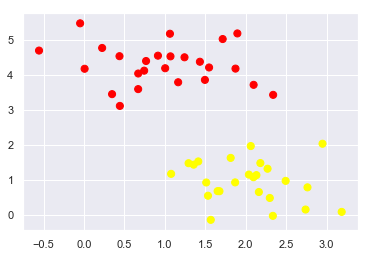

In [78]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification.
For two dimensional data like that shown here, this is a task we could do by hand.
But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

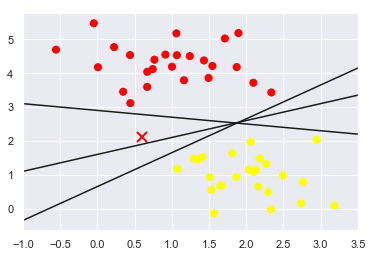

In [79]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three *very* different separators which, nevertheless, perfectly discriminate between these samples.
Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!
Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

##  <font color='red'>Discussion! </font> 
Let's pause for a second and look at this figure. Which hyperlane is the best one in this Figure? Why is the one you have chosen is the best one? How else could it be solved? 

## Support Vector Machines: Maximizing the *Margin*

Support vector machines offer one way to improve on this.
The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a *margin* of some width, up to the nearest point.
Here is an example of how this might look:

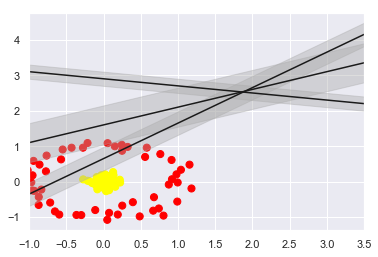

In [102]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model.
Support vector machines are an example of such a *maximum margin* estimator.

### Fitting a support vector machine

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data.
For the time being, we will use a linear kernel and set the ``C`` parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [123]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [104]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

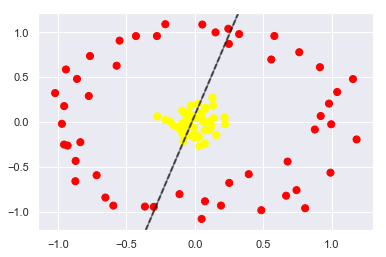

In [105]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

This is the dividing line that maximizes the margin between the two sets of points.
Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure.
These points are the pivotal elements of this fit, and are known as the *support vectors*, and give the algorithm its name.
In Scikit-Learn, the identity of these points are stored in the ``support_vectors_`` attribute of the classifier:

In [106]:
model.support_vectors_

array([[ 0.76231806,  0.77707816],
       [ 0.05413025,  1.08535843],
       [-0.97154969, -0.0190151 ],
       [-0.59596652, -0.92898936],
       [-0.86124078,  0.48018218],
       [-0.9420244 ,  0.58525649],
       [-0.71796577, -0.59075779],
       [-0.76628055,  0.73490681],
       [ 1.15470048,  0.47863499],
       [ 0.99038942, -0.56254751],
       [-0.9550226 ,  0.17789243],
       [-0.57174426,  0.62692316],
       [-0.65395495, -0.83923076],
       [ 1.18106947, -0.19291371],
       [-1.02111774,  0.32262124],
       [ 0.15053632,  0.99800744],
       [ 0.99568934, -0.02420923],
       [ 0.19065968, -0.92815947],
       [-0.11247075, -0.80139157],
       [ 0.58045573,  0.95795216],
       [ 0.87617691, -0.08246513],
       [-0.87123228, -0.43229368],
       [ 0.80525454, -0.95796013],
       [ 0.91338456,  0.61068311],
       [ 0.66628284, -0.81874784],
       [-0.92937897, -0.26114241],
       [ 0.24415718,  1.03848502],
       [-0.30000974, -0.94278347],
       [ 0.48528257,

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit!
Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

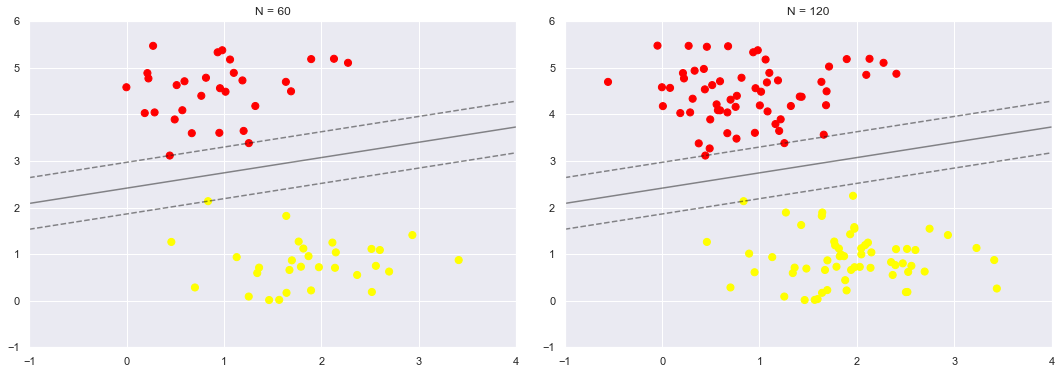

In [107]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points.
In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel.
This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

If you are running this notebook live, you can use IPython's interactive widgets to view this feature of the SVM model interactively:

In [108]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

### Beyond linear boundaries: Kernel SVM

Where SVM becomes extremely powerful is when it is combined with *kernels*.
There we projected our data into higher-dimensional space defined by polynomials and Gaussian basis functions, and thereby were able to fit for nonlinear relationships with a linear classifier.

In SVM models, we can use a version of the same idea.
To motivate the need for kernels, let's look at some data that is not linearly separable:

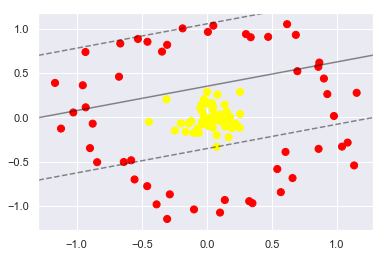

In [109]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

It is clear that no linear discrimination will *ever* be able to separate this data.
But we can draw a lesson from the basis function regressions, and think about how we might project the data into a higher dimension such that a linear separator *would* be sufficient.
For example, one simple projection we could use would be to compute a *radial basis function* centered on the middle clump:

Radial basis function expansions of the $x_{k}s$ with parameter $\sigma$ and kernel:
$K(x,y)=e^-\frac{(x-y)^2}{2 \sigma^{2}}$

In [110]:

# r = np.exp(-(X ** 2).sum(1))


In [111]:
from scipy.spatial.distance import pdist, squareform
import scipy
  # this is an NxD matrix, where N is number of items and D its dimensionalites. The summation has been used to be able to easily plot the data.
s=1
# print(X.dot(X.T), np.shape(X.dot(X.T)))
K= X.dot(X.T)
pairwise_sq_dists = squareform(pdist(X, 'sqeuclidean'))
r = np.exp(- (pairwise_sq_dists) / (2*s**2))
r=r.sum(1)



One important point is that some of the computation of the RBF kernel uses some linear algebra to make the computation faster, since NumPy is better at dealing with matrix manipulations than loops. The elements of the RBF kernel are $K_{ij} = 2\sigma e^{- \lVert x_{i} − x_{j}\lVert^{2}}$. We could go about forming this by using a pair of loops over $i$ and $j$, but instead we can use some algebra.

The linear kernel has computed $K_{ij} = x^{T}_{i} x_{j}$ , and the diagonal elements of this matrix are $\lVert x_{i} \lVert^2$ . The trick is to see how to use only these elements to compute the $\lVert x_{i} − x_{j}\lVert^{2}$ part, and it just requires expanding out the quadratic:


$(x_{i} − x_{j})^{2} = \lVert x_{i} \lVert^{2} + \lVert x_{j} \lVert^{2} − 2 x^{T}_{i} x_{j}$

The only work involved now is to make sure that the matrices are the right shape. This would be easy if it wasn’t for the fact that NumPy ‘loses’ the dimension of some N × 1 matrices, so that they are of size N only, as we have seen before. This means that we need to make a matrix of ones and use the transpose operator a few times, as can be seen in the code fragment below.

In [112]:
sigma=1
N = np.shape(X)[0]
K = np.dot(X,X.T)
xsquared = (np.diag(K)*np.ones((1,N))).T
b = np.ones((N,1))
K -= (1/2*sigma)*(np.dot(xsquared,b.T) + np.dot(b,xsquared.T))
K = np.exp(K/(2.*sigma**2))
r=K.sum(1)

We can visualize this extra data dimension using a three-dimensional plot—if you are running this notebook live, you will be able to use the sliders to rotate the plot:

In [113]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In [114]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

We can see that with this additional dimension, the data becomes trivially linearly separable, by drawing a separating plane at, say, *r*=0.7.

Here we had to choose and carefully tune our projection: if we had not centered our radial basis function in the right location, we would not have seen such clean, linearly separable results.
In general, the need to make such a choice is a problem: we would like to somehow automatically find the best basis functions to use.

One strategy to this end is to compute a basis function centered at *every* point in the dataset, and let the SVM algorithm sift through the results.
This type of basis function transformation is known as a *kernel transformation*, as it is based on a similarity relationship (or kernel) between each pair of points.

A potential problem with this strategy—projecting $N$ points into $N$ dimensions—is that it might become very computationally intensive as $N$ grows large.
However, because of a neat little procedure known as the [*kernel trick*](https://en.wikipedia.org/wiki/Kernel_trick), a fit on kernel-transformed data can be done implicitly—that is, without ever building the full $N$-dimensional representation of the kernel projection!
This kernel trick is built into the SVM, and is one of the reasons the method is so powerful.

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the ``kernel`` model hyperparameter:

In [115]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

C:\Users\CLL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

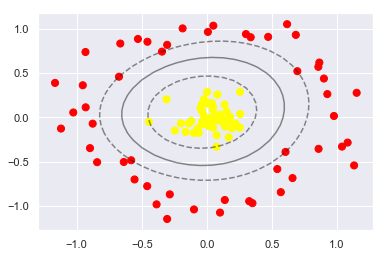

In [116]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

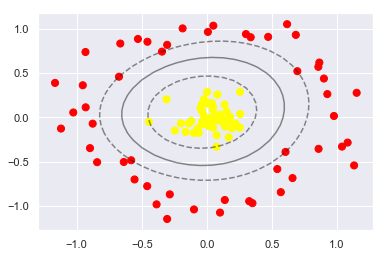

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Using this kernelized support vector machine, we learn a suitable nonlinear decision boundary.
This kernel transformation strategy is used often in machine learning to turn fast linear methods into fast nonlinear methods, especially for models in which the kernel trick can be used.

### Tuning the SVM: Softening Margins

Our discussion thus far has centered around very clean datasets, in which a perfect decision boundary exists.
But what if your data has some amount of overlap?
For example, you may have data like this:

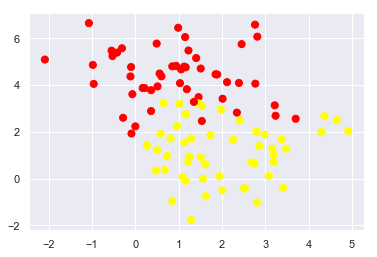

In [118]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

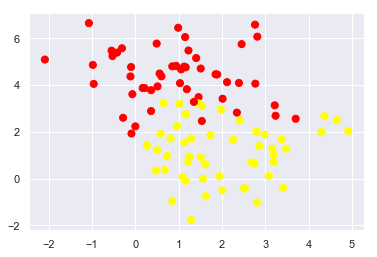

In [119]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

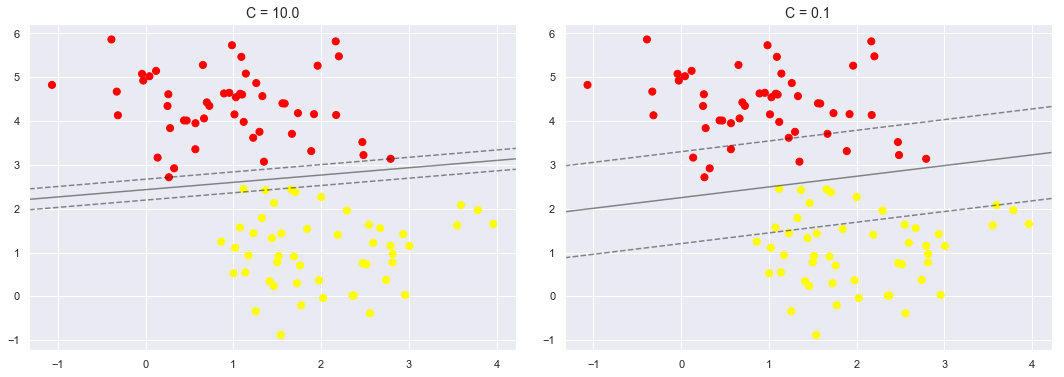

In [120]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

To handle this case, the SVM implementation has a bit of a fudge-factor which "softens" the margin: that is, it allows some of the points to creep into the margin if that allows a better fit.
The hardness of the margin is controlled by a tuning parameter, most often known as $C$.
For very large $C$, the margin is hard, and points cannot lie in it.
For smaller $C$, the margin is softer, and can grow to encompass some points.

The plot shown below gives a visual picture of how a changing $C$ parameter affects the final fit, via the softening of the margin:

The optimal value of the $C$ parameter will depend on your dataset, and should be tuned using cross-validation or a similar procedure.

<img src="./rbf.png" width="600">

## SVM Parameters
$C (=\frac{1}{\lambda})$:

  Large $C$: Lower bias, high variance.
  
  Small $C$: Higher bias, low variance.

$\sigma^{2}$:

  Large $\sigma^{2}$: 
  Features vary more smoothly.
  Higher bias, lower variance.

  Small $\sigma^{2}$: 
  Features vary less smoothly.
  Lower bias, higher variance.

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [121]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

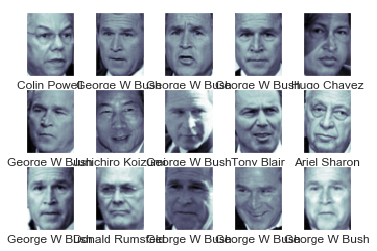

In [122]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [124]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

ImportError: cannot import name 'RandomizedPCA'

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [101]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

Finally, we can use a grid search cross-validation to explore combinations of parameters.
Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

In [ ]:
from sklearn.grid_search import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

We might also display the confusion matrix between these classes:

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.
For this kind of application, one good option is to make use of [OpenCV](http://opencv.org), which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.

## <font color='red'>Exercise! </font> 

Now that we learned what SVM is and how it works, let's combine our knowledge with audio analysis and revisit our previous notes. I want you to use the SVM library and classify the audio feature set and labels you obtained in the previous lecture notes. You need to use the $feautures$ and $labels$ variables! 